### ***Human Action Retrieval using spatiotemporal features***

***Import Libraries***

In [ ]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import struct
import os
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Reshape, Lambda
from keras.models import load_model
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, LSTM, Dense, Conv2DTranspose
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import pickle


***Mount Google Drive***

In [ ]:
from google.colab import drive
gpath = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x "/content/drive/My Drive/Dataset/Depth.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/My Drive/Dataset/Depth.rar

Creating    Depth                                                     OK
Extracting  Depth/a03_s06_e02_sdepth.bin                                   0%  OK 
Extracting  Depth/a05_s10_e01_sdepth.bin                                   0%  OK 
Extracting  Depth/a20_s10_e02_sdepth.bin                                   0%  OK 
Extracting  Depth/a10_s07_e02_sdepth.bin                                   0%  OK 
Extracting  Depth/a12_s04_e03_sdepth.bin                                   0%  OK 
Extracting  Depth/a17_s03_e01_sdepth.bin                                   0%  OK 
Extracting  Depth/a10_s10_e01_sdepth.bin                                   0%  OK 
Extracting  Depth/a09_s09_e03_sdepth.bin                                   1%  OK 
Extracting  Depth/a04_s10_e03_sdepth.bin                

### ***Reading Dataset Samples***

In [ ]:
print('Number of samples : ',len(os.listdir(path="/content/Depth/")))

Number of samples :  567


In [ ]:
dataset_path = "/content/Depth/"

### ***Defining Labels***

In [ ]:
class_names = {
    "a01": "High Arm Wave",
    "a02": "Horizontal Arm Wave",
    "a03": "Hammer",
    "a04": "Hand Catch",
    "a05": "Forward Punch",
    "a06": "High Throw",
    "a07": "Draw X",
    "a08": "Draw Tick",
    "a09": "Draw Circle",
    "a10": "Hand Clap",
    "a11": "Two Hand Wave",
    "a12": "Side-Boxing",
    "a13": "Bend",
    "a14": "Forward Kick",
    "a15": "Side Kick",
    "a16": "Jogging",
    "a17": "Tennis Swing",
    "a18": "Tennis Serve",
    "a19": "Golf Swing",
    "a20": "Pick Up and Throw"
}


class_labels = {
    "a01": 1,
    "a02": 2,
    "a03": 3,
    "a04": 4,
    "a05": 5,
    "a06": 6,
    "a07": 7,
    "a08": 8,
    "a09": 9,
    "a10": 10,
    "a11": 11,
    "a12": 12,
    "a13": 13,
    "a14": 14,
    "a15": 15,
    "a16": 16,
    "a17": 17,
    "a18": 18,
    "a19": 19,
    "a20": 20
}

:### ***Extracting Labels and corrsponding image sequences (videos)***

In [ ]:
#initializing empty lists

samples_list = []

lables_list = []

files_names_list = os.listdir(path=dataset_path)

#change these numbers for batch size
start = 500
end = 567

i = 0
for filename in files_names_list:
    i = i + 1
    print("Reading File - " + str(i))
    print()

    if not filename.endswith("depth.bin"):
        continue # skip file that is not binary file

    # Appending class labels in label list

    class_name = filename.split("_")[0]
    lables_list.append(class_labels[class_name])


    # Appending corresponding video/image sequence samples in sample list

    # Loading Depth videos from binary files
    with open(dataset_path + filename, "rb") as f:

        frame_count,  = struct.unpack('i', f.read(4))  # frame count

        """print(f"Frame count is {frame_count}")
        print('------------------')
        print()"""

        width,  = struct.unpack('i', f.read(4))  # width
        height,  = struct.unpack('i', f.read(4))  # height

        image_sequence = []

        # Creating frame image from binary bytes
        for single_frame in range(frame_count):

          # Reading Image Buffer

          bytes_buffer = f.read(width*height*4)

          flatten_array = np.frombuffer(bytes_buffer, dtype=np.uint32)

          single_depth_img = flatten_array.reshape((240, 320))

          #complete video sequence from image
          image_sequence.append(single_depth_img)


    samples_list.append(image_sequence)


print()
print('Number of samples : ' + str(len(samples_list)))

print()

#print(len(lables_list))



Reading File - 1

Reading File - 2

Reading File - 3

Reading File - 4

Reading File - 5

Reading File - 6

Reading File - 7

Reading File - 8

Reading File - 9

Reading File - 10

Reading File - 11

Reading File - 12

Reading File - 13

Reading File - 14

Reading File - 15

Reading File - 16

Reading File - 17

Reading File - 18

Reading File - 19

Reading File - 20

Reading File - 21

Reading File - 22

Reading File - 23

Reading File - 24

Reading File - 25

Reading File - 26

Reading File - 27

Reading File - 28

Reading File - 29

Reading File - 30

Reading File - 31

Reading File - 32

Reading File - 33

Reading File - 34

Reading File - 35

Reading File - 36

Reading File - 37

Reading File - 38

Reading File - 39

Reading File - 40

Reading File - 41

Reading File - 42

Reading File - 43

Reading File - 44

Reading File - 45

Reading File - 46

Reading File - 47

Reading File - 48

Reading File - 49

Reading File - 50

Reading File - 51

Reading File - 52

Reading File - 53

Re

### ***Visualizing Sequences***

Class label = Draw Circle


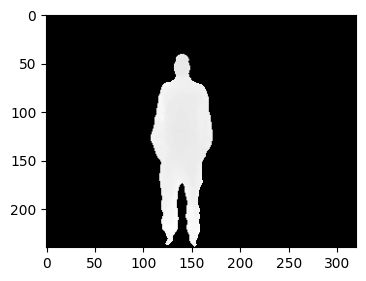

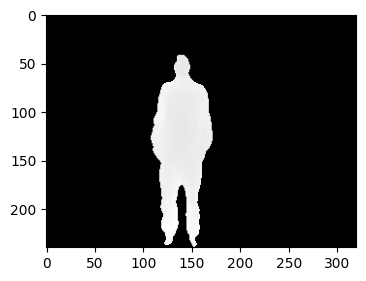

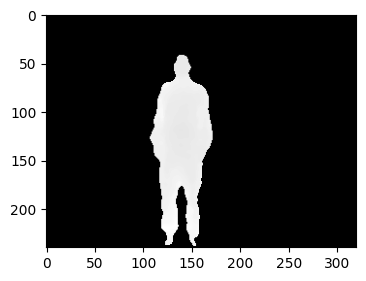

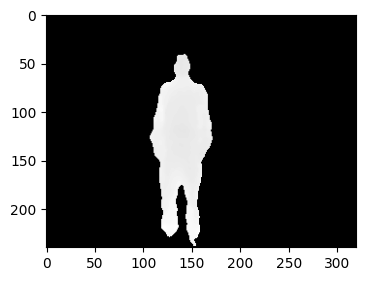

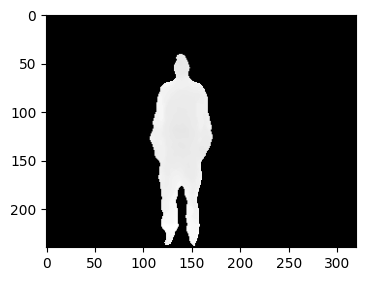

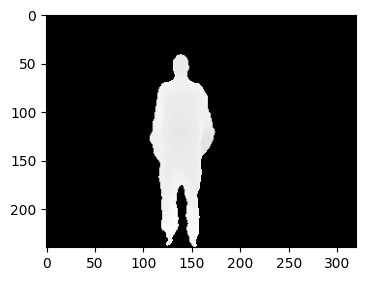

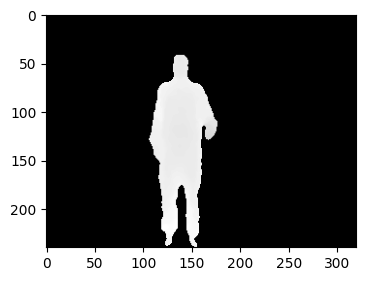

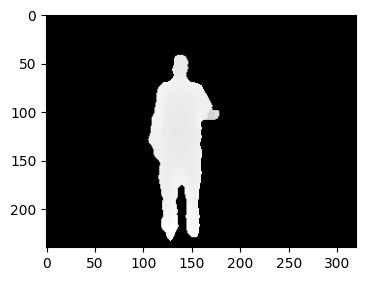

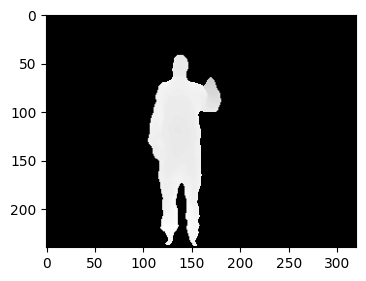

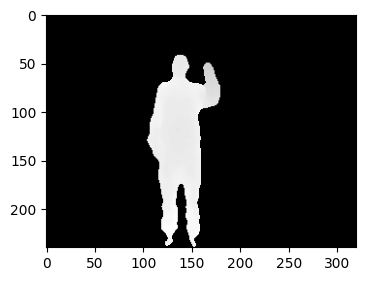

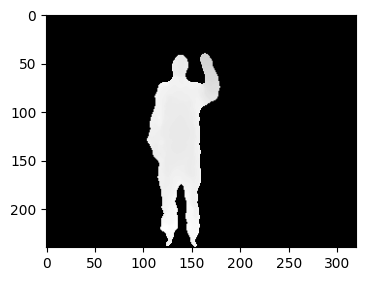

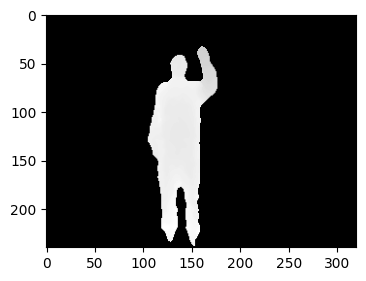

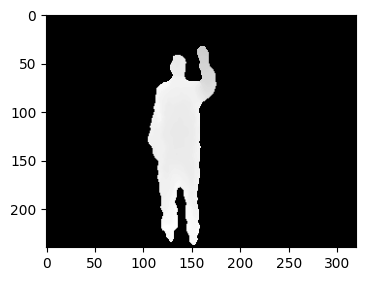

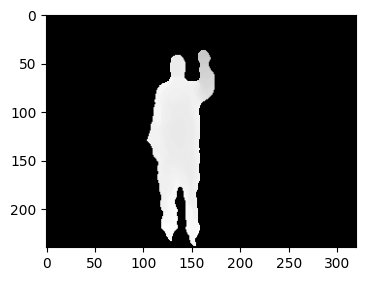

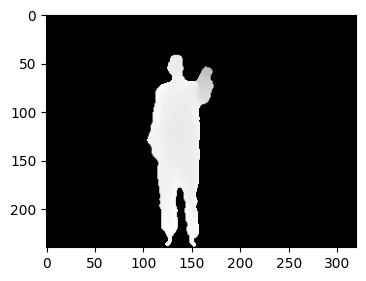

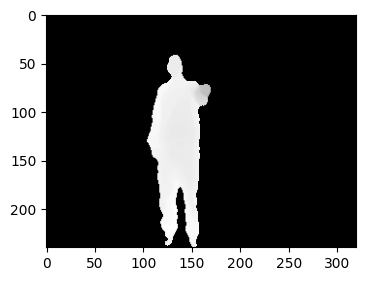

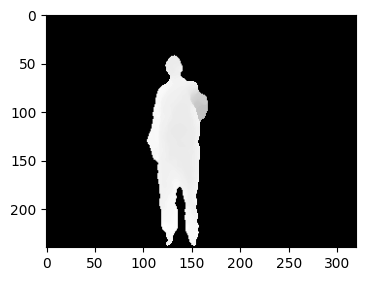

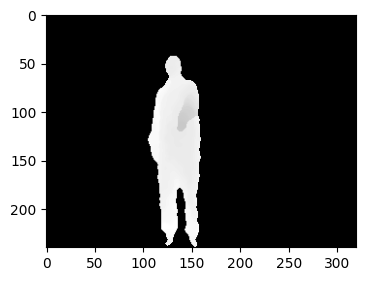

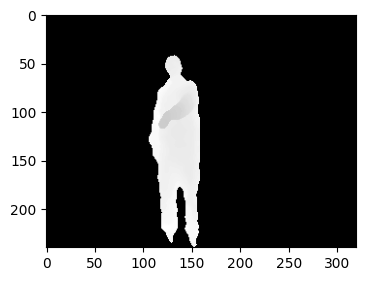

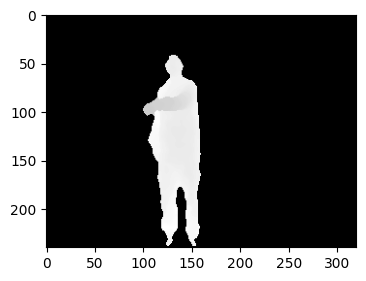

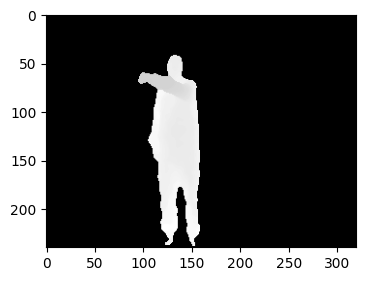

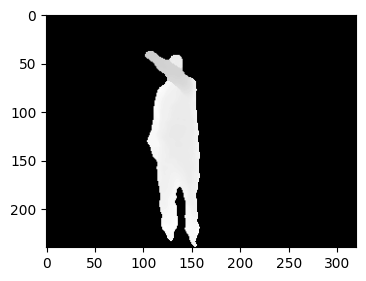

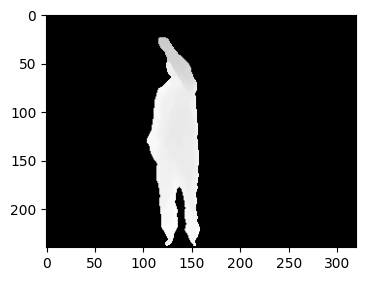

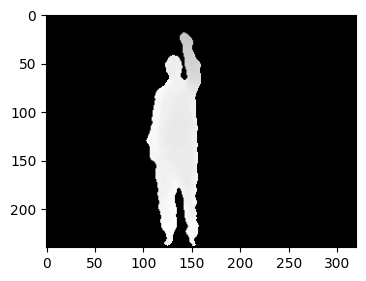

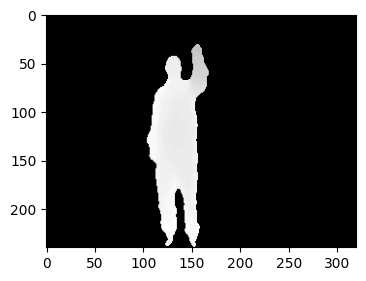

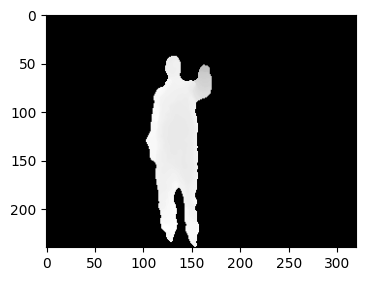

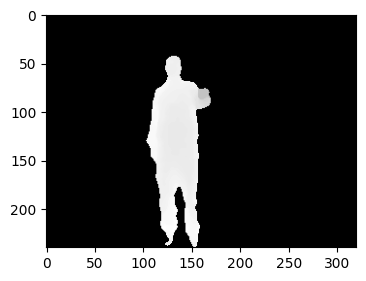

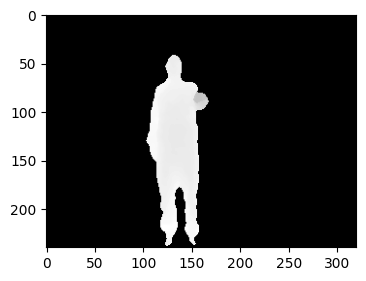

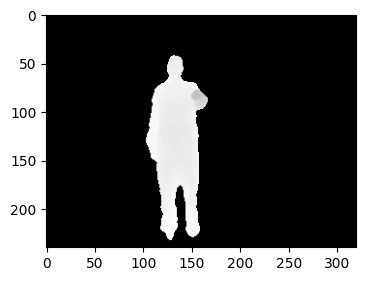

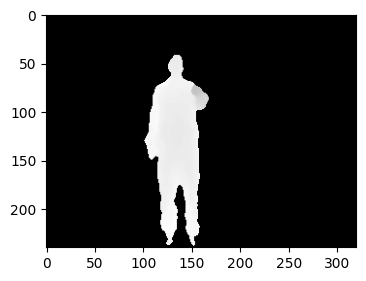

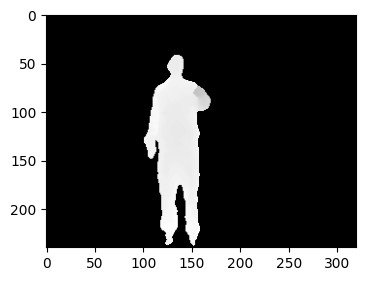

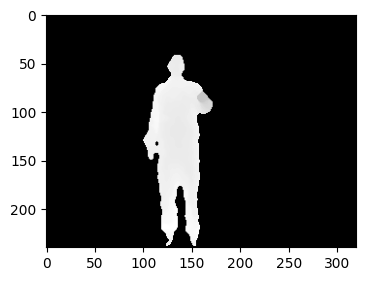

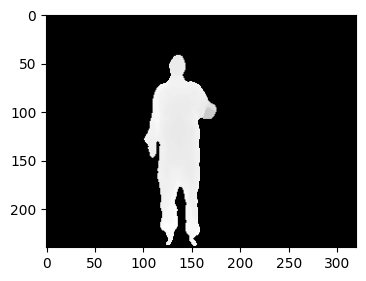

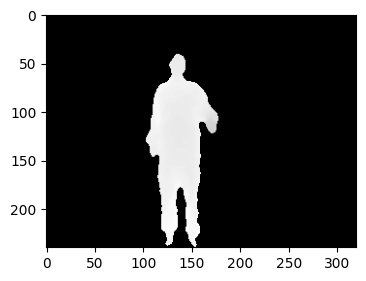

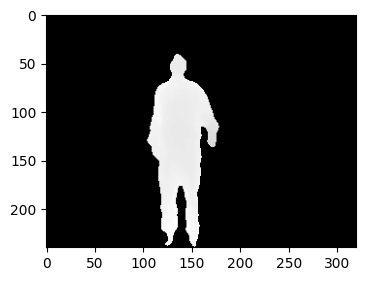

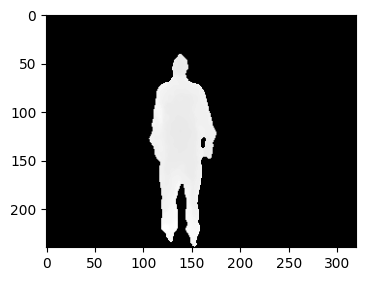

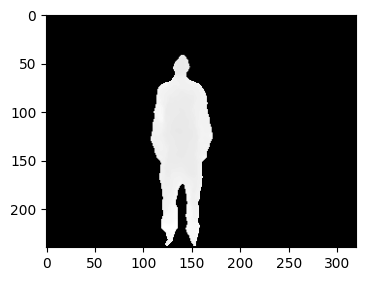

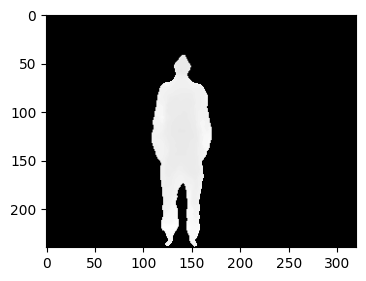

In [ ]:

sample_number = 139
label = lables_list[sample_number]


# getting label key
label_array = [[key, value] for key, value in class_labels.items() if value == label][0]

# getting label class name
print('Class label = ' + class_names[label_array[0]])

sequence_sample = samples_list[sample_number]


for image in sequence_sample:

  plt.figure(figsize=(4,4))
  plt.imshow(image, cmap='gray')
  plt.show()

  pass

### ***AutoEncoder (Dense Layer Based)***

In [ ]:
from skimage.transform import resize
from keras.optimizers import Adam


def dense_layer_autoencoder(image_sample):

  #size = 244       #dimension size
  size = 64

  single_depth_img = image_sample

  resized_depth_img = resize(single_depth_img, (size, size), anti_aliasing=True)

  normalized_depth_img = resized_depth_img.astype('float32') / np.max(resized_depth_img)

  reshaped_depth_img = normalized_depth_img.reshape((1, size, size, 1))

  # Input layer
  # Grayscale image (1 channel)
  encoder_input = Input(shape=(size, size, 1))

  encoder_flattened = Flatten()(encoder_input)
  encoder_output = Dense(256, activation='relu')(encoder_flattened)

  #decoder_input = Dense(59536, activation='relu')(encoder_output)
  decoder_input = Dense(4096, activation='relu')(encoder_output)
  decoder_output = Reshape((size,size,1))(decoder_input)

  opt = Adam(lr=0.001, decay = 1e-6)

  autoencoder = Model(encoder_input, decoder_output, name = "autoencoder")

  for i, layer in enumerate(autoencoder.layers):
    layer._name = 'layer_' + str(i)
  pass

  autoencoder.compile(opt, loss='mse')
  autoencoder.fit(reshaped_depth_img, reshaped_depth_img, epochs=10, batch_size=32, verbose=0 )

  #autoencoder_feature = autoencoder.predict(reshaped_depth_img.reshape(-1,size,size,1), verbose = 0)[0]

  encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('layer_2').output, name = "encoder")


  feature = encoder.predict(reshaped_depth_img, verbose=0)[0]
  autoencoder_feature = feature

  return autoencoder_feature
  pass

### ***Preprocessing***

***1.***   ***Gray Scale intensity values reduction***

***2.***   ***Resizing images***

***3.***   ***Dont apply above 2 if you are applying Autoencoder***


In [ ]:
#autoencoder_sequences = []

autoencoder_features = []

sequences_labels_list = []

batch = 4

#iterating through each image sequence/video
for index in range(len(samples_list)):

  #autoencoder_frame = []
  frame_feature = []
  #iterating through each frame
  for j in range(len(samples_list[index])):

    """old_max_intensity_value = np.max(samples_list[index][j])
    print()
    print('Maximum intensity value is : ' + str (old_max_intensity_value))

    plt.figure(figsize=(4,4))
    plt.subplot(1, 2, 1)
    plt.title('Old')
    plt.imshow(samples_list[index][j], cmap='gray')"""


    # reducing grayscale intensity values (pixel values)

    #samples_list[index][j] = np.uint8(np.float32(samples_list[index][j])/1024*255)

    #samples_list[index][j] = (cv2.resize(samples_list[index][j], (224,224), interpolation=cv2.INTER_CUBIC))


    """Applying Autoencoder"""

    #samples_list[index][j] = dense_layer_autoencoder(samples_list[index][j])

    frame_feature.append(dense_layer_autoencoder(samples_list[index][j]))

    """print()
    print('Maximum intensity value is : + ' str(np.max(samples_list[index][j])))

    plt.subplot(1, 2, 2)
    plt.title('new')
    plt.imshow(samples_list[index][j], cmap='gray')
    plt.show()"""



    pass


  autoencoder_features.append(frame_feature)
  sequences_labels_list.append(lables_list[index])

  """save_file_path = '/content/drive/MyDrive/features/autoencoder_samples/autoencoder_list_'+ str(batch) +'.pkl'

  with open(save_file_path, 'wb') as f:  # open a text file
      pickle.dump(autoencoder_sequences, f) # serialize the list
      pass

  save_labels_path = '/content/drive/MyDrive/features/autoencoder_samples/labels_list_'+ str(batch) +'.pkl'

  with open(save_labels_path, 'wb') as f:  # open a text file
      pickle.dump(sequences_labels_list, f) # serialize the list
      pass"""


  print('Sample - ' + str (index + 1) + ' done') #' preprocessing done')
  pass

In [ ]:
batch = 5
save_file_path = '/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_'+ str(batch) +'.pkl'

with open(save_file_path, 'wb') as f:  # open a text file
    pickle.dump(autoencoder_features, f) # serialize the list
    pass

In [ ]:
save_labels_path = '/content/drive/MyDrive/features/autoencoder_samples/feature_labels_'+ str(batch) +'.pkl'

with open(save_labels_path, 'wb') as f:  # open a text file
    pickle.dump(sequences_labels_list, f) # serialize the list
    pass

***resizing***

In [ ]:
#iterating through each image sequence/video
for index in range(len(samples_list)):


  #iterating through each frame
  for j in range(len(samples_list[index])):

    """old_max_intensity_value = np.max(samples_list[index][j])
    print()
    print('Maximum intensity value is : ' + str (old_max_intensity_value))

    plt.figure(figsize=(4,4))
    plt.subplot(1, 2, 1)
    plt.title('Old')
    plt.imshow(samples_list[index][j], cmap='gray')"""


    # reducing grayscale intensity values (pixel values)

    samples_list[index][j] = np.uint8(np.float32(samples_list[index][j])*1)

    samples_list[index][j] = (cv2.resize(samples_list[index][j], (224,224), interpolation=cv2.INTER_CUBIC))


    """print()
    print('Maximum intensity value is : + ' str(np.max(samples_list[index][j])))

    plt.subplot(1, 2, 2)
    plt.title('new')
    plt.imshow(samples_list[index][j], cmap='gray')
    plt.show()"""



    pass


  print('Sample - ' + str (index + 1) + ' done') #' preprocessing done')
  pass

### ***Feature Extraction***

***Spatial Features***

In [ ]:
from keras.applications.vgg16 import preprocess_input

#Extract image features with VGG
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet',include_top=False)

In [ ]:
sequence_features_list = []

i = 0
#iterating through each image sequence/video
for index in range(len(samples_list)):
  i = i + 1
  frames_features_list = []
  #iterating through each frame
  for j in range(len(samples_list[index])):

    vgg_input_img = np.stack((samples_list[index][j],)*3, axis=-1)

    vgg_input_img = vgg_input_img.reshape((1, vgg_input_img.shape[0], vgg_input_img.shape[1], vgg_input_img.shape[2]))
    vgg_input_img = preprocess_input(vgg_input_img)
    feature = model.predict(vgg_input_img, verbose=0) ######## FEATURES ########

    frames_features_list.append(feature.reshape(-1))

    pass

  sequence_features_list.append(frames_features_list)
  print("Feature Extracted --- " + str(i))

  pass


In [ ]:
#shape of each frame image feature
print(frames_features_list[0].shape)
print(len(sequence_features_list))

(25088,)
67


***Saving Features***

In [ ]:
print(len(sequence_features_list))

batch_number = 6

save_file_path = '/content/drive/MyDrive/features/vgg_features_'+str(batch_number)+'.pkl'

"""if not os.path.exists("/content/drive/MyDrive/features/"):

    os.makedirs("/content/drive/MyDrive/features")"""

with open(save_file_path, 'wb') as f:  # open a text file
    pickle.dump(sequence_features_list, f) # serialize the list

67


In [ ]:
lables_list

print(len(lables_list))


save_file_path = '/content/drive/MyDrive/features/labels.pkl'



with open(save_file_path, 'wb') as f:  # open a text file
    pickle.dump(lables_list, f) # serialize the list

567


***Temporal Features***

In [ ]:
def extract_temporal_features_from_frames(frame_array):
    frame_diffs = []

    prev_frame = None
    for frame in frame_array:
        if prev_frame is not None:
            frame = cv2.absdiff(frame.astype(np.uint8), prev_frame.astype(np.uint8))
            frame_diff_mean = np.mean(frame)
            frame_diffs.append(frame_diff_mean)
            pass
        else:
            # differencing last frame from 1st because no previous frame before 1st frame
            frame_diffs.append(np.mean(cv2.absdiff(frame.astype(np.uint8), frame_array[len(frame_array)-1].astype(np.uint8))))
            pass

        prev_frame = frame
        pass

    # Transform the frame_diffs into a one-dimensional temporal feature vector
    feature_vector = np.array(frame_diffs)

    return feature_vector

In [ ]:
# Extract temporal features from the frame array
temporal_feature_list = []

#samples list is the list of frame sequences/videos
for sample in samples_list:
  temporal_feature_vector = extract_temporal_features_from_frames(sample)
  temporal_feature_list.append(temporal_feature_vector)
  pass


In [ ]:
print(len(temporal_feature_list))

"""if not os.path.exists("/content/drive/MyDrive/features"):

    os.makedirs("/content/drive/MyDrive/features")"""

with open('/content/drive/MyDrive/features/temporal_features.pkl', 'wb') as f:  # open a text file
    pickle.dump(temporal_feature_list, f) # serialize the list

567




---



In [ ]:
temporal_feature_list = pickle.load(open("/content/drive/MyDrive/features/temporal_features.pkl", "rb"))

sequence_features_list_1 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_1.pkl", "rb"))
sequence_features_list_2 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_2.pkl", "rb"))
sequence_features_list_3 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_3.pkl", "rb"))
sequence_features_list_4 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_4.pkl", "rb"))
sequence_features_list_5 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_5.pkl", "rb"))
sequence_features_list_6 = pickle.load(open("/content/drive/MyDrive/features/vgg_features_6.pkl", "rb"))



# ***Start from here***

In [ ]:
encoder_features_list_1 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_1.pkl", "rb"))
encoder_features_list_2 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_2.pkl", "rb"))
encoder_features_list_3 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_3.pkl", "rb"))
encoder_features_list_4 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_4.pkl", "rb"))
encoder_features_list_5 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/autoencoder_features_5.pkl", "rb"))


labels_list_1 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/feature_labels_1.pkl", "rb"))
labels_list_2 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/feature_labels_2.pkl", "rb"))
labels_list_3 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/feature_labels_3.pkl", "rb"))
labels_list_4 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/feature_labels_4.pkl", "rb"))
labels_list_5 = pickle.load(open("/content/drive/MyDrive/features/autoencoder_samples/feature_labels_5.pkl", "rb"))

temporal_feature_list = pickle.load(open("/content/drive/MyDrive/features/temporal_features.pkl", "rb"))

In [ ]:
encoder_features_list = []

for feature in encoder_features_list_1:

  encoder_features_list.append(feature)

  pass



for feature in encoder_features_list_2:

  encoder_features_list.append(feature)

  pass



for feature in encoder_features_list_3:

  encoder_features_list.append(feature)

  pass



for feature in encoder_features_list_4:

  encoder_features_list.append(feature)

  pass



for feature in encoder_features_list_5:

  encoder_features_list.append(feature)

  pass



In [ ]:
print(len(encoder_features_list))

567


In [ ]:
labels_list = []

for feature in labels_list_1:

  labels_list.append(feature)

  pass



for feature in labels_list_2:

  labels_list.append(feature)

  pass



for feature in labels_list_3:

  labels_list.append(feature)

  pass



for feature in labels_list_4:

  labels_list.append(feature)

  pass



for feature in labels_list_5:

  labels_list.append(feature)

  pass



In [ ]:
print(len(labels_list))

567


In [ ]:
sequence_features_list = []

for feature in sequence_features_list_1:

  sequence_features_list.append(feature)

  pass



for feature in sequence_features_list_2:

  sequence_features_list.append(feature)

  pass



for feature in sequence_features_list_3:

  sequence_features_list.append(feature)

  pass



for feature in sequence_features_list_4:

  sequence_features_list.append(feature)

  pass



for feature in sequence_features_list_5:

  sequence_features_list.append(feature)

  pass


for feature in sequence_features_list_6:

  sequence_features_list.append(feature)

  pass



In [ ]:
#sequence_features_list = encoder_features_list

In [ ]:
print(len(temporal_feature_list[112]))
print(len(sequence_features_list[112]))

print(len(samples_list[112]))

In [ ]:
print(len(sequence_features_list[1][1]))

25088


In [ ]:
weighted_features_list = []


for i in range(len(sequence_features_list)):

  FD_i_dot_FM_i_list = []
  Sum_FD_i = sum(temporal_feature_list[i]) # Adding all frames difference (temporal features) togather for ith video/frame sequence sample to get Sum_FD_i

  for j in range(len(sequence_features_list[i])):

    # multiplying each element (1,2,3,4 ...... k(1000)) of Complete spatial feature map FM_i (having length 1000) with weight temporal feature FD_i
    # to get N (45 frames for video 1) weighted arrays of length k(1000)

    #                         1000 elements (FM_i_(1-1000))       1 element (FD_i)
    #                               |    |                             |    |
    #                               |    |                             |    |
    #                               |    |                             |    |
    #                              \      /                           \      /
    #                               \    /                             \    /
    #                                \  /                               \  /
    #                                 \/                                 \/

    FD_i_dot_FM_i_list.append(sequence_features_list[i][j] * temporal_feature_list[i][j])


    pass

  # Now applying summation (column wise) to all weighted arrays 'FD_i_dot_FM_i' in FD_i_dot_FM_i_list

  complete_FD_i_dot_FM_i_array = np.array(FD_i_dot_FM_i_list).sum(axis=0)

  # dividing every weighted sum element FM_i_dot_FD_i in complete array with sum_FD_i

  complete_FD_i_dot_FM_i_array = complete_FD_i_dot_FM_i_array/Sum_FD_i

  weighted_features_list.append(complete_FD_i_dot_FM_i_array)
  #break
  pass

print(len(weighted_features_list))


567


In [ ]:

weighted_features_list = []


for i in range(len(autoencoder_features)):

  FD_i_dot_FM_i_list = []
  Sum_FD_i = sum(temporal_feature_list[i]) # Adding all frames difference (temporal features) togather for ith video/frame sequence sample to get Sum_FD_i

  for j in range(len(autoencoder_features[i])):

    # multiplying each element (1,2,3,4 ...... k(1000)) of Complete spatial feature map FM_i (having length 1000) with weight temporal feature FD_i
    # to get N (45 frames for video 1) weighted arrays of length k(1000)

    #                         1000 elements (FM_i_(1-1000))       1 element (FD_i)
    #                               |    |                             |    |
    #                               |    |                             |    |
    #                               |    |                             |    |
    #                              \      /                           \      /
    #                               \    /                             \    /
    #                                \  /                               \  /
    #                                 \/                                 \/

    FD_i_dot_FM_i_list.append(autoencoder_features[i][j] * temporal_feature_list[i][j])


    pass

  # Now applying summation (column wise) to all weighted arrays 'FD_i_dot_FM_i' in FD_i_dot_FM_i_list

  complete_FD_i_dot_FM_i_array = np.array(FD_i_dot_FM_i_list).sum(axis=0)

  # dividing every weighted sum element FM_i_dot_FD_i in complete array with sum_FD_i

  complete_FD_i_dot_FM_i_array = complete_FD_i_dot_FM_i_array/Sum_FD_i

  weighted_features_list.append(complete_FD_i_dot_FM_i_array)
  #break
  pass

print(len(weighted_features_list))


100


In [ ]:
X = weighted_features_list
Y = labels_list

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size = .80)


In [ ]:
print(len(X_train),len(X_test))

453 114


In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(2048,1024,512), max_iter=200, early_stopping=False,activation = 'relu',solver='adam',random_state=42, verbose = True)

classifier.fit(X_train, Y_train)

Iteration 1, loss = 22.67720646
Iteration 2, loss = 31.98020106
Iteration 3, loss = 30.52672941
Iteration 4, loss = 27.37370345
Iteration 5, loss = 23.27363328
Iteration 6, loss = 17.38718364
Iteration 7, loss = 7.51365640
Iteration 8, loss = 3.64403304
Iteration 9, loss = 2.49634201
Iteration 10, loss = 2.15024778
Iteration 11, loss = 1.72269200
Iteration 12, loss = 1.49012292
Iteration 13, loss = 1.26677498
Iteration 14, loss = 1.05795432
Iteration 15, loss = 0.88448265
Iteration 16, loss = 0.72354738
Iteration 17, loss = 0.61717297
Iteration 18, loss = 0.51827136
Iteration 19, loss = 0.43202597
Iteration 20, loss = 0.36444342
Iteration 21, loss = 0.28300035
Iteration 22, loss = 0.27080444
Iteration 23, loss = 0.20890791
Iteration 24, loss = 0.18066222
Iteration 25, loss = 0.15529700
Iteration 26, loss = 0.15950896
Iteration 27, loss = 0.10856633
Iteration 28, loss = 0.11955881
Iteration 29, loss = 0.09039772
Iteration 30, loss = 0.08234210
Iteration 31, loss = 0.09324276
Iteration 3

MLPClassifier(hidden_layer_sizes=(2048, 1024, 512), random_state=42,
              verbose=True)

In [ ]:
predictions = classifier.predict(X_test)

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

ConfusionMatrix = confusion_matrix(predictions, Y_test)

print("Accuracy of MLPClassifier : \n")

print(accuracy(ConfusionMatrix))

Accuracy of MLPClassifier : 

0.9210526315789473
